In [1]:
import numpy as np
import pandas as pd
import json
import sys
import os
import seaborn as sns 
import matplotlib.pyplot as plt
sys.path.append("../")
PATH = "../.."

from func_dimRed import func_dimRed, func_plot_dimRed
from func_preprocess import read_data, subset_wo_missigness, remove_NA, parseVariables, clean_data, impute_scale 



# Load and preprocess dataset

In [2]:
''' 1. read data '''
data = read_data(PATH, FILENAME="fullRegistry")   #"all_data_edited_v3_mgfaRecoded_inverse"

''' 
2. OPTIONAL: make subanalysis for variables with high missigness 
specify which variable should be kept in the dataset; remove rest of vars with too much missigness

var_subset_analysis = False    --> no subanalysis
var_subset_analysis = ["variable 1", "variable 2", ...]  e.g. ["histologie", "dekrement_testergebnis"]          --> subanalysis!

'''
#######
var_subset_analysis =  False
#######
if var_subset_analysis: 
    data = subset_wo_missigness(data, var_subset_analysis)
data_clean = remove_NA(data, cutoff_perc=35)

''' 
3. OPTIONAL. remove problematic variables (correlated or else)
'''
vars2remove = pd.read_csv(f"{PATH}/data/variables_to_remove_clustering.txt", header=None)[0].tolist()           
data_clean_parsed = parseVariables(data_clean, vars2remove)

''' 
4. clean variables; e.g. MGFA classification
'''
data_clean_parsed = clean_data(data_clean_parsed)

''' 
5. impute and scale
`df_imputedScaled` = scaled dataset for clustering algorithm
`df_reverseTransform` = unscaled "normal" values for plotting - makes it easier to interpret plot
'''
df_imputedScaled, df_reverseTransform = impute_scale(data_clean_parsed, ohe_yn=False)
print(df_imputedScaled.shape)


''' 
6. add PID again
'''
df_imputedScaled.index = data_clean_parsed.index
df_reverseTransform.index = data_clean_parsed.index



LOADING DATA


REMOVING MISSINGNESS (cutoff=35%)
Keeping 35/40 variables
Discarded: ['testergebnisdekrement_rb', 'testergebnispyridostigmin_rb', 'lrp4antikoerper_rb', 'histologie_sprb', 'scoreqmg_neu']


REMOVING BIASING / UNWANTED VARIABLES
Discarded: ['zn_myasthener_krise_jn', 'aktueller_mgfa_score', 'okulaer', 'bulbaer', 'generalisiertemuskelschwaeche', 'kortison_sprb', 'azathioprin_sprb', 'methotrexatfolsauure_sprb', 'mycophenolatmofetil_sprb', 'eculizumab_sprb', 'rituximab_sprb', 'plasmapherese_sprb', 'immunadsorption_sprb', 'ivig_sprb', 'age', 'age_bei_diagnose', 'scoreqol_neu', 'chronicfatigue_neu', 'seelischesbefinden_neu']
(1814, 16)


CLEANING DATASET


IMPUTING & SCALING


(1814, 16)


In [ ]:
df_reverseTransform.head()

# Run unsupervised clustering

In [14]:
pca_varRatio, df_dimRed = func_dimRed(df_imputedScaled, random_state=None)  #11

PC1 (explained variance: 0.21)
PC2 (explained variance: 0.15)


## Plot

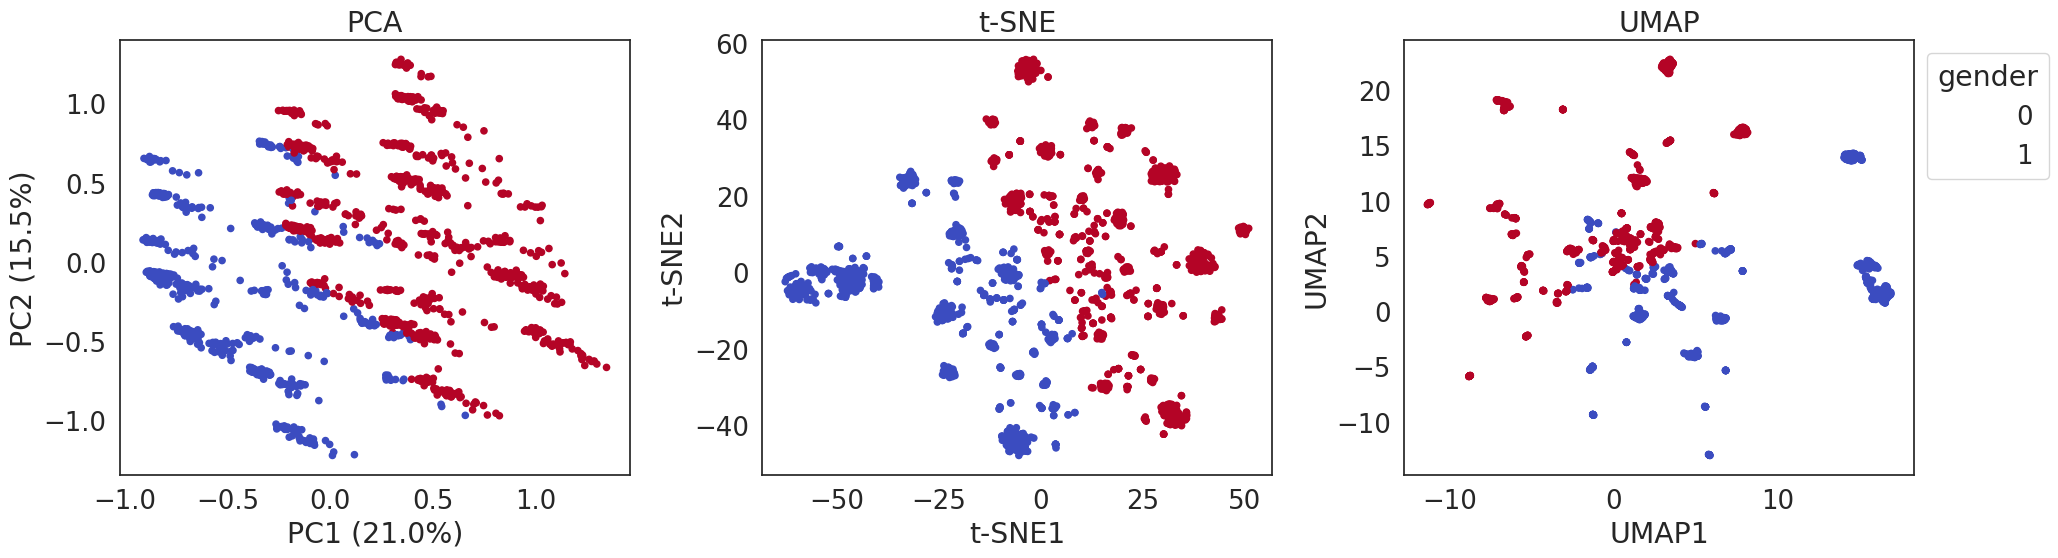

In [18]:
fig_gender = func_plot_dimRed(df_dimRed, df_reverseTransform, pca_varRatio, varInterest = "gender", savefig=True)

KeyError: 'chronicfatigue_normalised'

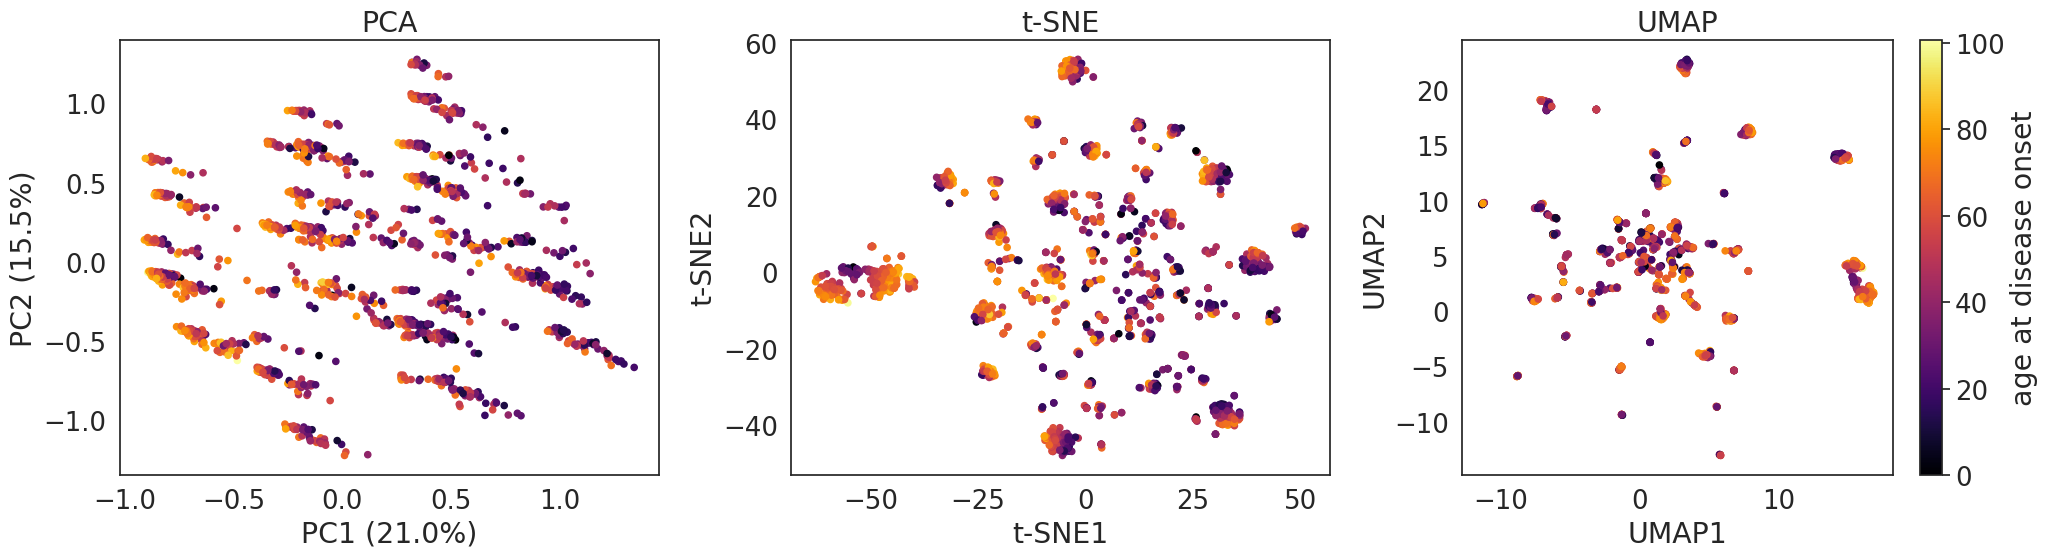

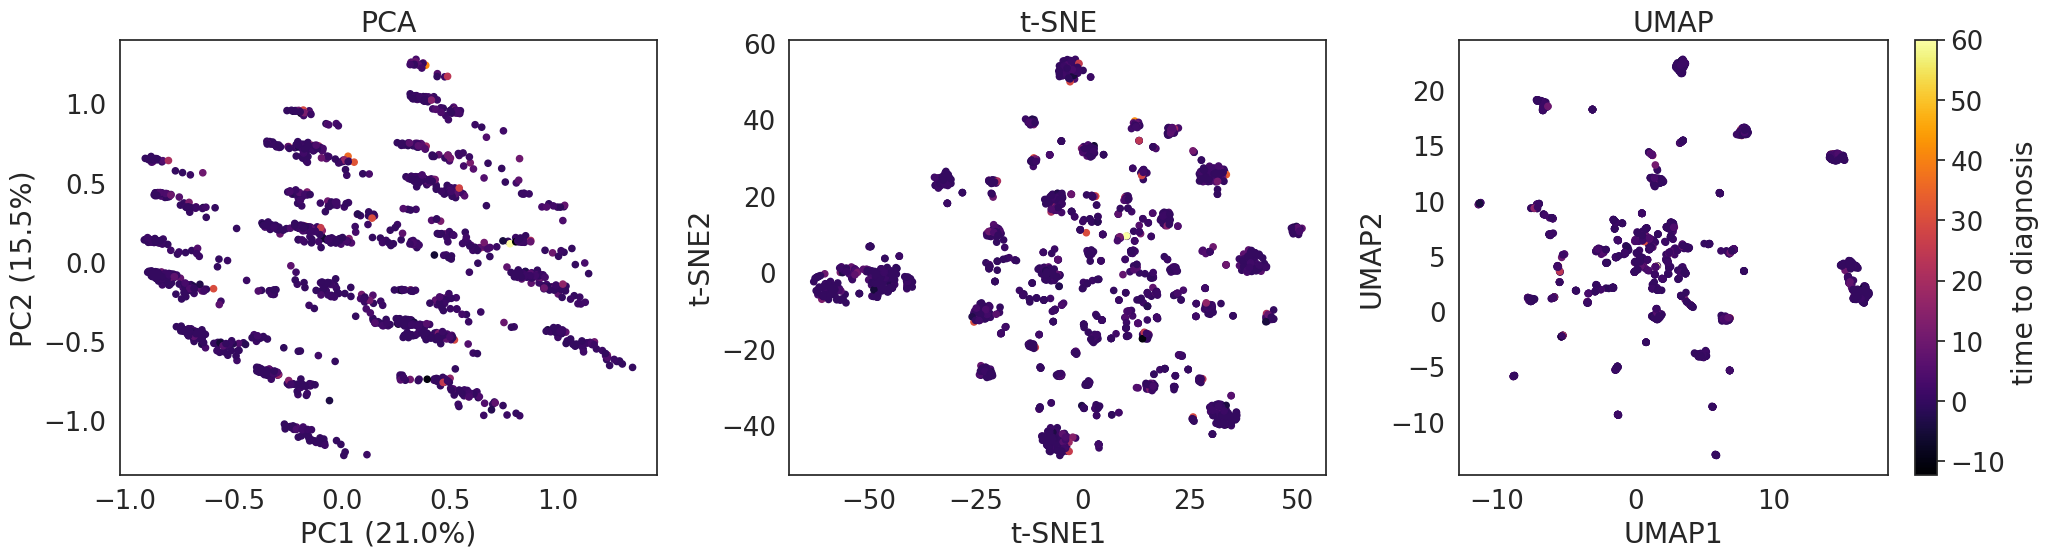

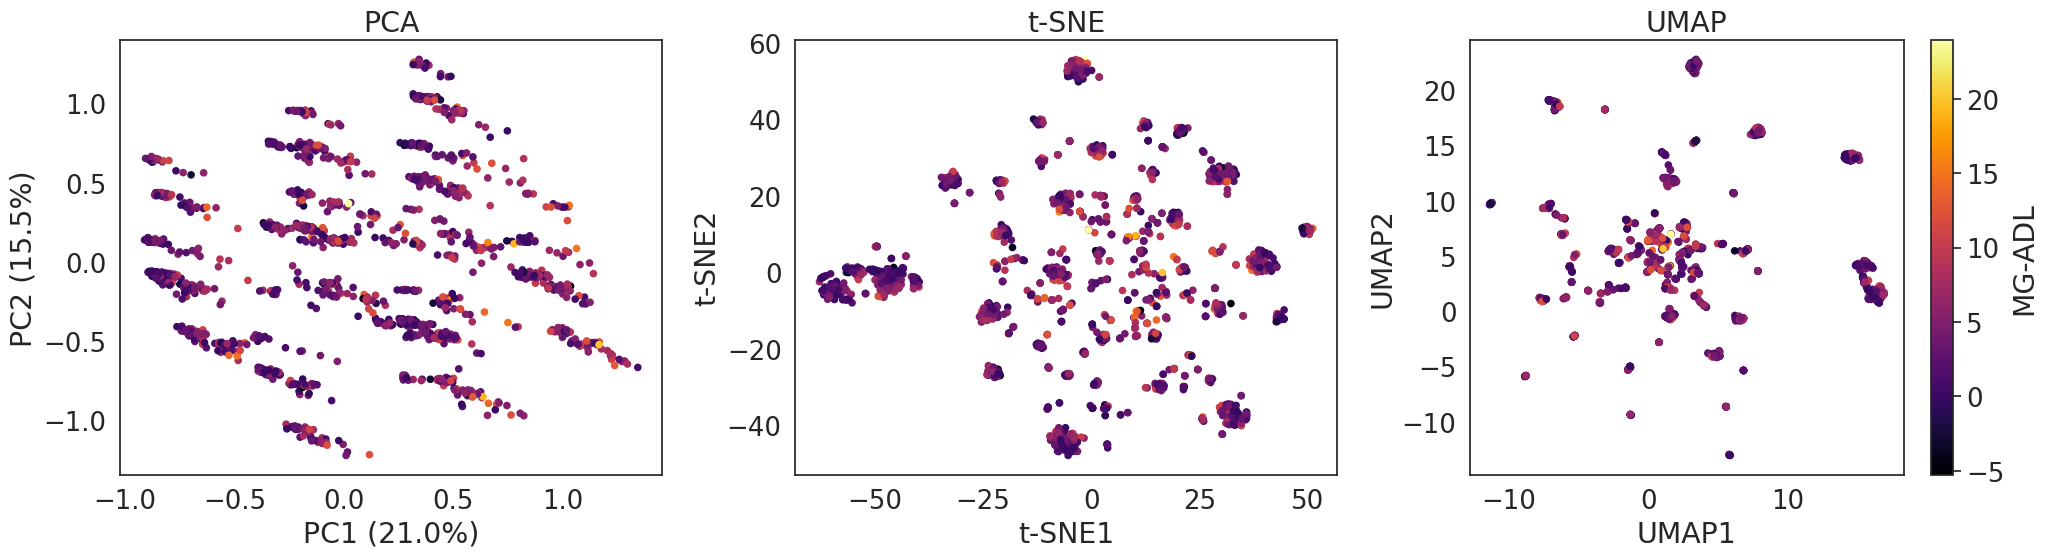

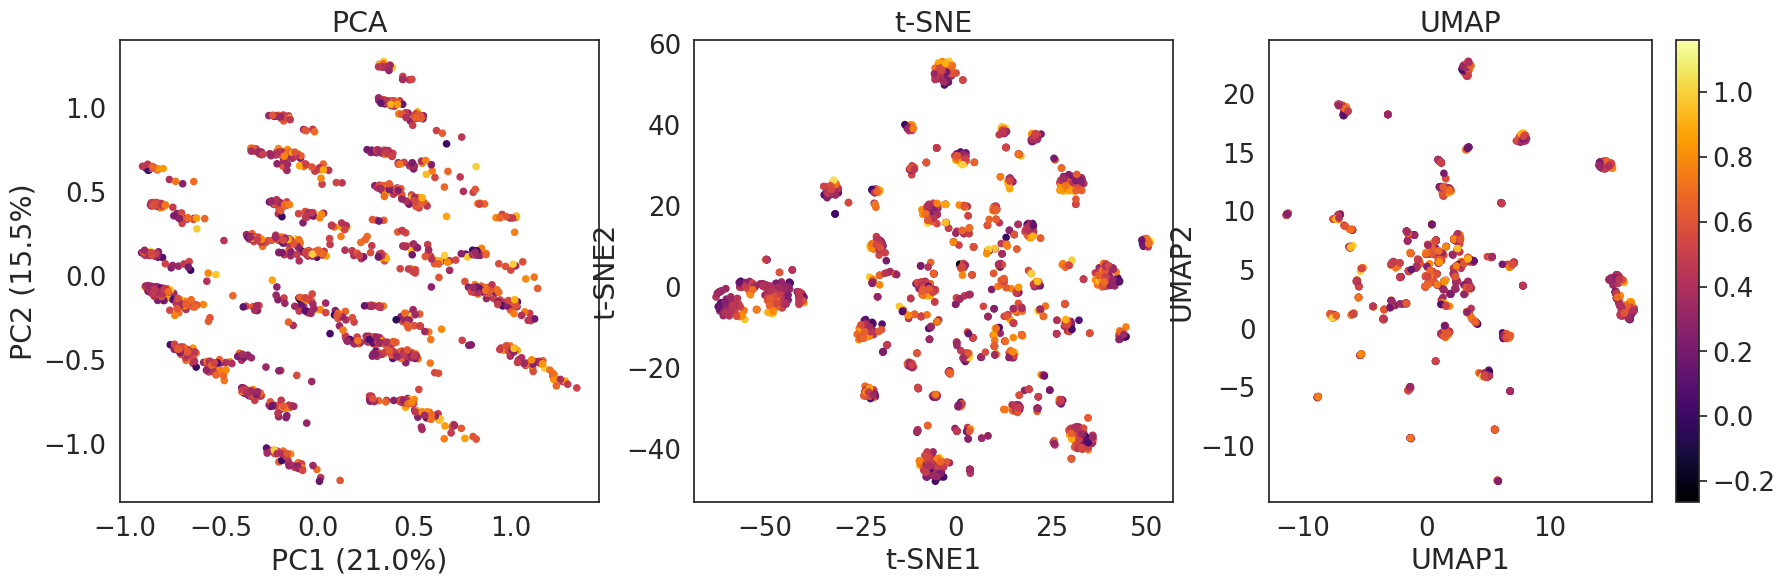

In [16]:
for var in df_reverseTransform.columns:
    func_plot_dimRed(df_dimRed, df_reverseTransform, pca_varRatio, varInterest = var, savefig=True)